In [14]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

In [15]:
with open('./input.json') as file:
    data = json.load(file)

In [16]:
SIZE_OF_ONE_IMAGE = 35

In [17]:
def generate_dataframe(data):
    x, y = [], []
    for _ in range(10000):
        random_number = random.randint(0,9)

        x.append(random.choice(data[str(random_number)]))
        y.append(list(map(int, list('0' * random_number + '1' + (9 - random_number) * '0'))))
    return x, y

In [18]:
X, Y = generate_dataframe(data)

In [19]:
def plot_image(pixels):
    plt.imshow(pixels.reshape((7, 5)))
    plt.show()

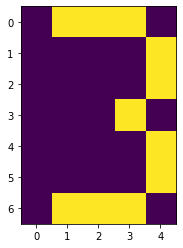

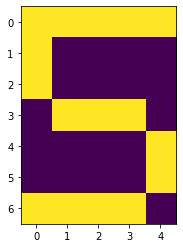

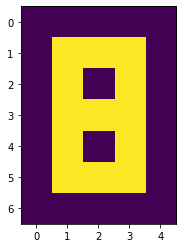

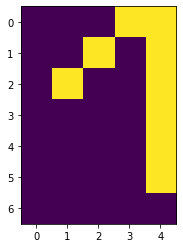

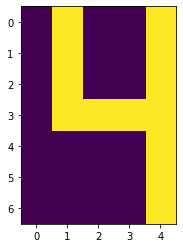

In [20]:
for i in range(5):
    random_number = random.randint(0,len(X)-1)
    plot_image(np.array(X[random_number]))

In [21]:
def split_train_test(x, y, koef):
    length = len(x)
    X_train, Y_train = [], []
    for _ in range(int(length * koef)):
        random_number = random.randint(0,len(x) - 1)
        
        X_train.append(x.pop(random_number))
        Y_train.append(y.pop(random_number))
    return X_train, Y_train, x, y
        

In [22]:
X_train, Y_train, X_temp, Y_temp = split_train_test(X, Y, 0.7)
X_validation, Y_validation, X_test, Y_test = split_train_test(X_temp, Y_temp, 0.2)

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(SIZE_OF_ONE_IMAGE,), units=128, activation='relu'))
model.add(keras.layers.Dense(30))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4608      
                                                                 
 dense_5 (Dense)             (None, 30)                3870      
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 9,308
Trainable params: 9,308
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
res = model.fit(X_train, Y_train, epochs=5, batch_size=128, validation_data=(X_validation, Y_validation))

Epoch 1/5
55/55 [==============================] - 64s 1s/step - loss: 2.2211 - accuracy: 0.3016 - val_loss: 1.9770 - val_accuracy: 0.5117
Epoch 2/5
55/55 [==============================] - 0s 3ms/step - loss: 1.7763 - accuracy: 0.6071 - val_loss: 1.5570 - val_accuracy: 0.7150
Epoch 3/5
55/55 [==============================] - 0s 2ms/step - loss: 1.3755 - accuracy: 0.8201 - val_loss: 1.1833 - val_accuracy: 0.9050
Epoch 4/5
55/55 [==============================] - 0s 2ms/step - loss: 1.0264 - accuracy: 0.9390 - val_loss: 0.8728 - val_accuracy: 0.9783
Epoch 5/5
55/55 [==============================] - 0s 3ms/step - loss: 0.7466 - accuracy: 0.9841 - val_loss: 0.6339 - val_accuracy: 1.0000


In [28]:
model.evaluate(X_test, Y_test)

75/75 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 1.0000


[0.6171808838844299, 1.0]

In [29]:
predicted_results = model.predict(np.array([0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1]).reshape(1,-1), batch_size=128)
predicted_results.argmax()

2